In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def open_plain_txt(path):
    file = open(path, 'r')
    text = file.read()
    file.close()
    return text

In [19]:
def get_params(lst):
    lst = list(filter(None, lst))
    for i in range(len(lst)):
        lst[i] = int(lst[i])
    return lst

In [20]:
class Pizza():
    def __init__(self, lst):
        self.num_ing = int(lst[0])
        self.ingredients = lst[1:]

In [23]:
def parse_input(path):
    text = open_plain_txt(path)
    text = text.split('\n')

#     for s in text:
#         print(s, end=" ")
    params = text[0].split(' ')
    params = get_params(params)
    pizzas = text[1:]
    pizzas = list(filter(None,pizzas))
    objs = []
    for i in range(len(pizzas)):
        objs.append(Pizza(pizzas[i].split(' ')))
        
#     print(objs.)
    return params, objs

In [7]:
def get_all_ing(pizza_list):
    all_ingredients = set()
    for i in range(len(pizza_list)):
        all_ingredients = all_ingredients | set(pizza_list[i].ingredients)
    return all_ingredients

In [8]:
def min_extra_groups(excess):
    mod = excess%4
    num_twos = 0
    num_threes = 0
    num_fours = 0
    groups_data = [0,0,0]
    if mod:
        if mod == 1:
            num_fours = int(excess/4)-1
            num_threes = 1
            num_twos = 1
        elif mod == 2:
            num_fours = int(excess/4)
            num_twos = 1
        elif mod == 3:
            num_fours = int(excess/4)
            num_threes = 1
    else:
        num_fours = int(excess/4)
    groups_data[0] = num_twos
    groups_data[1] = num_threes
    groups_data[2] = num_fours
    return groups_data

def max_extra_groups(excess):
    mod = excess%2
    num_twos = 0
    num_threes = 0
    groups_data = [0,0,0]
    if mod:
        num_twos = int(excess/2) - 1
        num_threes = 1
    else:
        num_twos = int(excess/2)
    groups_data[0] = num_twos
    groups_data[1] = num_threes
    return groups_data

In [9]:
def exercise_info(params, pizza_list):
    pizza_amount = params[0]
    group_two = params[1]
    group_three = params[2]
    group_four = params[3]
    all_groups = group_two+group_three + group_four
    pizzas_needed = group_two*2+group_three*3+group_four*4
    excess = pizzas_needed - pizza_amount
    all_ingredients = get_all_ing(pizza_list)
    
    print(f'Доступно пицц: {pizza_amount}')
    print(f'Групп из 2-х человек: {group_two}')
    print(f'Групп из 3-х человек: {group_three}')
    print(f'Групп из 4-х человек: {group_four}\n')
    print(f'Количество пицц, нужных, чтобы накормить все группы: {pizzas_needed}\n')
    print(f'С помощью {pizza_amount} можно накормить:') 
    print(f'Максимум {all_groups - sum(min_extra_groups(excess))} из {all_groups} групп. ({min_extra_groups(excess)})')
    print(f'Минимум {all_groups - sum(max_extra_groups(excess))} из {all_groups} групп. ({max_extra_groups(excess)})\n')
    print(f'Тогда, без учета потерь на совпадающие ингридиенты:') 
    print(f'Максимальные очки = {100*(all_groups - sum(min_extra_groups(excess)))}')
    print(f'Минимальные очки = {100*(all_groups - sum(max_extra_groups(excess)))}')
    print(f'Всего уникальных ингридиентов {len(all_ingredients)}: {all_ingredients}')

In [10]:
class Result():
    def __init__(self):
        self.power = 0
        self.pizzas = set()

In [53]:
def get_combinations(players, pizza_multiplicity, combinations):
#     combinations = []
    if players == 4:
        len_pizza = len(pizza_multiplicity)
        i3 = 3
        i2 = 2
        i1 = 1
        i0 = 0
        i3_start = i3
        i2_start = i2
        i1_start = i1
        i0_start = i0
        while (i0 < len_pizza - 3):
            while (i1 < len_pizza - 2):
                while (i2 < len_pizza - 1):
                    while (i3 < len_pizza):
                        # подсчет
                        res = Result()
                        res.pizzas = set.union(pizza_multiplicity[i0], pizza_multiplicity[i1], pizza_multiplicity[i2], pizza_multiplicity[i3])
                        res.power = len(res.pizzas)
                        if not combinations:
                            combinations.append(res)
                        else:
                            for s in range(len(combinations) - 1):
                                if len(combinations[s].pizzas) <= len(res.pizzas):
                                    combinations.insert(s, res)
                                    break
                            else:
                                combinations.append(res)
                        i3 += 1
                    i2 += 1
                    i3_start += 1
                    i3 = i3_start
                i1 += 1
                i2_start += 1
                i2 = i2_start
                i3 = i3_start = i2_start + 1
            i0 += 1
            i1_start += 1
            i1 = i1_start
            i2 = i2_start = i1_start + 1
            i3 = i3_start = i2_start + 1

In [54]:
params, pizza_list = parse_input('b_little_bit_of_everything.in')
#params, pizza_list = parse_input('a_example')
print(pizza_list[1].ingredients)
print(pizza_list[1].num_ing)

# создаем множества
pizza_multiplicity = []
for i in range(len(pizza_list)):
    pizza_multiplicity.append(set(pizza_list[i].ingredients))
    
combinations = []
get_combinations(4, pizza_multiplicity, combinations)
for c in combination:
    print(c.power, end='\n')


# for i in pizza_multiplicity:
#     print(i, end='\n')

# for i in params:
#     print(i, end=' ')

['mushrooms', 'tomatoes', 'onions', 'pineapple', 'neapolitan-crust', 'emmental-cheese', 'mozzarella', 'cheddar']
8


KeyboardInterrupt: 

In [ ]:
# выбираем команду с максимальым количеством человек


Доступно пицц: 500
Групп из 2-х человек: 65
Групп из 3-х человек: 60
Групп из 4-х человек: 60

Количество пицц, нужных, чтобы накормить все группы: 550

С помощью 500 можно накормить:
Максимум 172 из 185 групп. ([1, 0, 12])
Минимум 160 из 185 групп. ([25, 0, 0])

Тогда, без учета потерь на совпадающие ингридиенты:
Максимальные очки = 17200
Минимальные очки = 16000
Всего уникальных ингридиентов 10: {'mushrooms', 'cheddar', 'emmental-cheese', 'basil', 'ham', 'mozzarella', 'tomatoes', 'pineapple', 'onions', 'neapolitan-crust'}


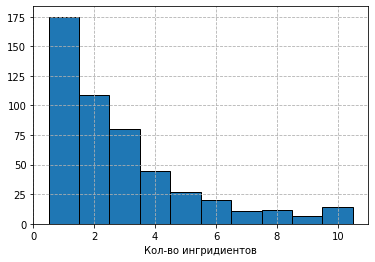

In [35]:
#Гистограмма распределения количества ингридиентов.

nums = []
for i in range(params[0]):
    nums.append(pizza_list[i].num_ing)

plt.figure(1)
plt.clf()
plt.hist(nums, bins=np.arange(min(nums), max(nums)+2), align = 'left', edgecolor = 'black')
plt.grid(linestyle = '--')
plt.xlim(0,max(nums)+1)
plt.xlabel('Кол-во ингридиентов')
exercise_info(params, pizza_list)
